In [1]:
import os 
import matplotlib.pyplot as plt 
import cv2
import numpy as np  
import pandas as pd 
from sklearn.model_selection import train_test_split
import tensorflow as tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop


In [2]:
dataset_path = "Datasets/Brain Tumor Data Set"

In [3]:
categories = ["Healthy",'Brain_Tumor']

In [25]:
data = []
labels=[]

image_size = 128

In [26]:
type(data)

list

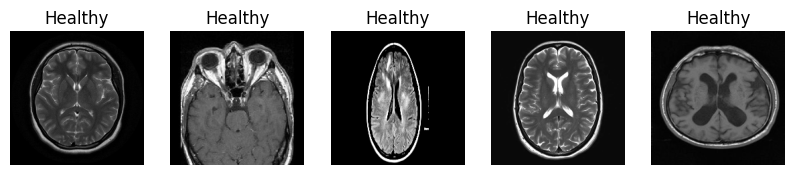

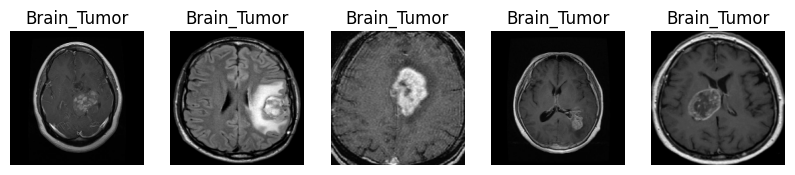

In [27]:
for category in categories:
    folder_path = os.path.join(dataset_path,category)
    image_files = os.listdir(folder_path)[:5]

    plt.figure(figsize=(10,6))
    for i ,img_name in enumerate(image_files):
        img_path = os.path.join(folder_path,img_name)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image,(200,200))
        plt.subplot(1,5,i+1)
        plt.imshow(image,cmap= "gray")
        plt.title(category)
        plt.axis("off")

    
    plt.show()

In [28]:
for category in categories:
    folder_path = os.path.join(dataset_path, category)
    label = categories.index(category)

    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        
        # Read the image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        if image is None:
            print(f"Error loading image: {image_path}")  # Track which images are problematic
        else:
            # Resize the image to the target size
            image = cv2.resize(image, (image_size, image_size))
            # Normalize pixel values to range [0, 1]
            image = image / 255.0

            # Append the image and corresponding label to the data and labels lists
            data.append(image)
            labels.append(label)

# Convert lists to numpy arrays
data = np.array(data).reshape(-1, image_size, image_size, 1)
labels = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [8]:
# from sklearn.model_selection import StratifiedShuffleSplit
# sss = StratifiedShuffleSplit(n_splits= 1 ,test_size= 0.2, random_state=42)

# for train_idx,test_idx in sss.split(data,labels):
#     X_train, X_test = data[train_idx], data[test_idx]
#     y_train, y_test = labels[train_idx], labels[test_idx]

In [9]:
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Data Shape: (3680, 128, 128, 1)
Testing Data Shape: (920, 128, 128, 1)
Training Labels Shape: (3680,)
Testing Labels Shape: (920,)


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32

datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate images randomly by 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by 20%
    height_shift_range=0.2, # Shift images vertically by 20%
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Flip images horizontally
    fill_mode='nearest'     # Fill pixels after transformation
)
val_datagen = ImageDataGenerator()  # No augmentation for validation data
val_generator = val_datagen.flow(X_test, y_test, batch_size=batch_size)

In [11]:
datagen.fit(X_train)

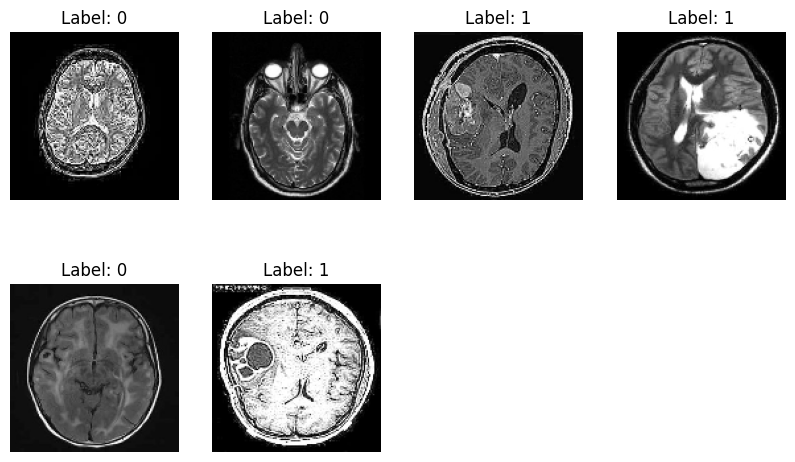

In [12]:
plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(2, 4, i+1)
    plt.imshow(X_train[i].reshape(128, 128), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.show()

In [13]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),  # First Conv Layer
    MaxPooling2D((2,2)),  # Pooling Layer
    
    Conv2D(64, (3,3), activation='relu'),  # Second Conv Layer
    MaxPooling2D((2,2)),  

    Conv2D(128,(3,3),activation = 'relu'),# third ConvLayer
    MaxPooling2D((2,2)),

    Conv2D(256,(3,3),activation = 'relu'),# 4th ConvLayer
    MaxPooling2D((2,2)),
    

    Flatten(),  # Flatten the feature maps into a 1D vector
    
    Dense(128, activation='relu'),  # Fully Connected Layer
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)), 
    Dense(1, activation='sigmoid')  # Output Layer (1 neuron for binary classification)
])

model.summary()  # Print model architecture


C:\Users\Mahadev\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,584,257 (6.04 MB)

 Trainable params: 1,584,257 (6.04 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
optimizer = RMSprop(learning_rate= 0.001)#root mean square propogation best for CNN and RNN

In [15]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

es = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.01,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)
mc = ModelCheckpoint(
    filepath = "./bestmodel.h5",
    monitor="val_accuracy",
    verbose=0,
    save_best_only=True,
    mode="auto",
    
)
cd = [es,mc]

In [22]:
batch_size = 32

train_generator = datagen.flow(X_train,y_train,batch_size = batch_size)

history = model.fit(train_generator, epochs=10, validation_data=(X_test, y_test),callbacks = cd)

Epoch 1/10


C:\Users\Mahadev\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.8041 - loss: 0.4471 

115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - accuracy: 0.8040 - loss: 0.4471 - val_accuracy: 0.8326 - val_loss: 0.4115
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 173ms/step - accuracy: 0.8174 - loss: 0.4221 - val_accuracy: 0.7435 - val_loss: 0.6524
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.8247 - loss: 0.4252 

115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - accuracy: 0.8247 - loss: 0.4251 - val_accuracy: 0.8913 - val_loss: 0.2858
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.8330 - loss: 0.3910 

115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 173ms/step - accuracy: 0.8331 - loss: 0.3910 - val_accuracy: 0.8957 - val_loss: 0.2703
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 174ms/step - accuracy: 0.8418 - loss: 0.3756 - val_accuracy: 0.8522 - val_loss: 0.3701
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 184ms/step - accuracy: 0.8625 - loss: 0.3586 - val_accuracy: 0.8196 - val_loss: 0.4812


In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8843 - loss: 0.3027
Test Accuracy: 89.13%


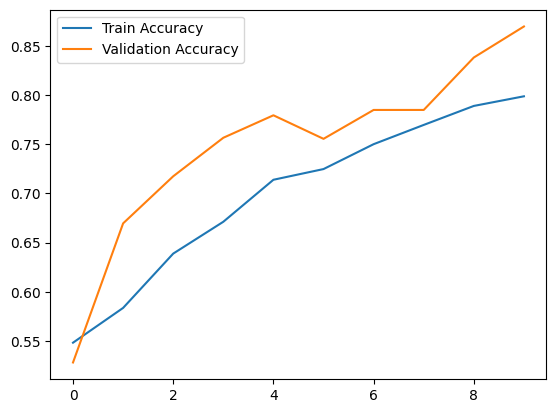

In [19]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

<h3>1.If validation accuracy is much lower than training accuracy, the model might be overfitting.</h3>
<h3>2.If loss does not decrease over epochs, the model might not be learning properly.</h3>


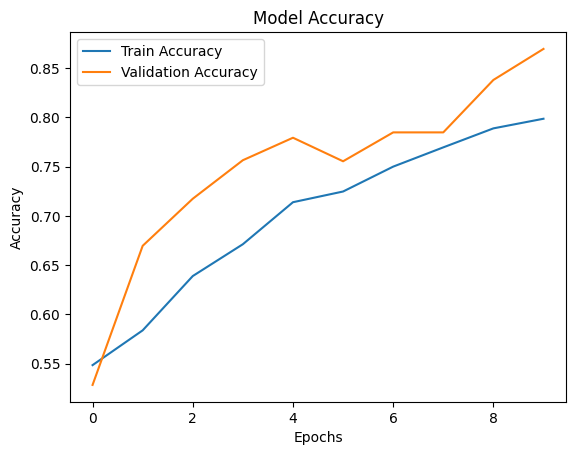

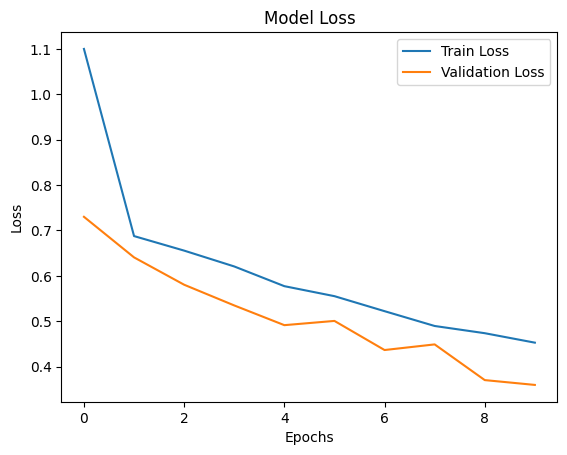

In [20]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [53]:
model.save("brain_tumor_model.h5")
